In [ ]:
import os

In [ ]:
! unzip /content/drive/MyDrive/Intel_classification_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
test_datagen=ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

In [ ]:
train_it=train_datagen.flow_from_directory("/content/seg_train/seg_train",target_size=(64,64),batch_size=64,class_mode="categorical")
test_it=test_datagen.flow_from_directory("/content/seg_test/seg_test",target_size=(64,64),batch_size=64,class_mode="categorical")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
train_it.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
test_it.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(include_top=False,input_shape=(64,64,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
def baseline_model():
  vgg=VGG16(include_top=False,input_shape=(64,64,3))
  for layer in vgg.layers:
    layer.trainable=False
  flat=Flatten()(vgg.output)
  class1=Dense(64,activation="relu",kernel_initializer="he_uniform")(flat)
  class2=Dropout(0.02)(class1)
  class3=Dense(128,activation="relu",kernel_initializer="he_uniform")(class2)
  output=Dense(6,activation="softmax")(class2)
  model=Model(inputs=vgg.input,outputs=output)
  opt=Adam(learning_rate=0.001)
  model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
  return model


In [ ]:
model=baseline_model()

In [ ]:
hist=model.fit_generator(train_it,verbose=1,epochs=10,validation_data=test_it)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
220/220 [==============================] - 44s 151ms/step - loss: 1.8531 - accuracy: 0.6345 - val_loss: 0.7889 - val_accuracy: 0.7173
Epoch 2/10
220/220 [==============================] - 32s 145ms/step - loss: 0.7110 - accuracy: 0.7461 - val_loss: 0.6252 - val_accuracy: 0.7700
Epoch 3/10
220/220 [==============================] - 34s 155ms/step - loss: 0.6061 - accuracy: 0.7840 - val_loss: 0.6043 - val_accuracy: 0.7853
Epoch 4/10
220/220 [==============================] - 32s 145ms/step - loss: 0.5669 - accuracy: 0.7961 - val_loss: 0.5511 - val_accuracy: 0.8080
Epoch 5/10
220/220 [==============================] - 32s 144ms/step - loss: 0.5357 - accuracy: 0.8075 - val_loss: 0.5732 - val_accuracy: 0.8040
Epoch 6/10
220/220 [==============================] - 32s 144ms/step - loss: 0.5116 - accuracy: 0.8115 - val_loss: 0.5481 - val_accuracy: 0.8187
Epoch 7/10
220/220 [==============================] - 32s 144ms/step - loss: 0.4928 - accuracy: 0.8194 - val_loss: 0.5209 - val_ac

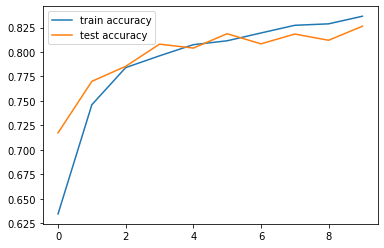

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="test accuracy")
plt.legend()

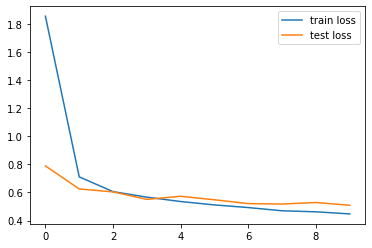

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="test loss")
plt.legend()

In [ ]:
# tar=os.listdir("/content/seg_train/seg_train")
# tar

In [ ]:
tar=list(train_it.class_indices.keys())
tar

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
def model_prediction(img_path):
  img=load_img(img_path,target_size=(64,64))
  img=img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img).argmax()
  # print(p)
  for i in range(5):
    if p==i:
      print(tar[i])
      break
  
  else:
    print("Not reconised")
    


In [ ]:
model_prediction("/content/seg_test/seg_test/forest/20056.jpg")

forest


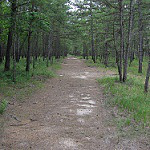

In [ ]:
load_img("/content/seg_test/seg_test/forest/20056.jpg")

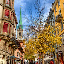

In [ ]:
k=load_img("/content/seg_pred/seg_pred/10004.jpg",target_size=(64,64,3))
k

In [ ]:
k=img_to_array(k)

In [ ]:
k.shape

(64, 64, 3)

In [ ]:
model_prediction("/content/seg_pred/seg_pred/10004.jpg")

Not reconised


In [ ]:
model_prediction("/content/seg_pred/seg_pred/10017.jpg")

mountain


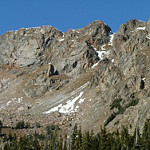

In [ ]:
load_img("/content/seg_pred/seg_pred/10017.jpg")

In [ ]:
model_prediction("/content/seg_pred/seg_pred/101.jpg")

glacier


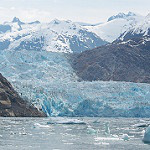

In [ ]:
load_img("/content/seg_pred/seg_pred/101.jpg")

In [ ]:
model_prediction("/content/seg_pred/seg_pred/10129.jpg")

glacier


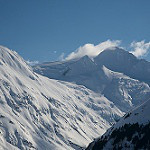

In [ ]:
load_img("/content/seg_pred/seg_pred/10129.jpg")

In [ ]:
model_prediction("/content/seg_test/seg_test/sea/20077.jpg")

sea


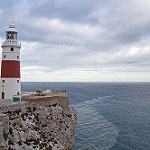

In [ ]:
load_img("/content/seg_test/seg_test/sea/20077.jpg")

In [ ]:
model_prediction("/content/seg_train/seg_train/buildings/10318.jpg")

buildings


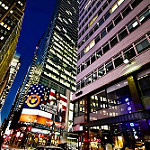

In [ ]:
load_img("/content/seg_train/seg_train/buildings/10318.jpg")

In [ ]:
model_prediction("/content/seg_train/seg_train/forest/10020.jpg")

forest


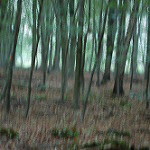

In [ ]:
load_img("/content/seg_train/seg_train/forest/10020.jpg")

In [ ]:
model_prediction("/content/seg_train/seg_train/buildings/10018.jpg")

buildings


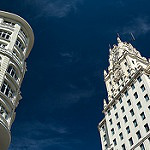

In [ ]:
load_img("/content/seg_train/seg_train/buildings/10018.jpg")

In [ ]:
  img=load_img("/content/seg_train/seg_train/buildings/10018.jpg",target_size=(64,64))
  img=img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img).argmax()

In [ ]:
p

0

In [ ]:
train_it.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
  img=load_img("/content/seg_pred/seg_pred/10017.jpg",target_size=(64,64))
  img=img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img).argmax()

In [ ]:
p

In [ ]:
load_img("/content/seg_pred/seg_pred/10017.jpg")

In [ ]:
x=[0,1,2,3,4,5]
y=int(input("Enter the number: "))
for i in range(6):
  if i==y:
    print(x[i])

In [ ]:
x[0]

In [ ]:
def x(path):
  k=load_img(path)
  return k

In [ ]:
x("/content/seg_pred/seg_pred/10017.jpg")

In [ ]:
def pred(path):
  img=load_img(path,target_size=(64,64))
  img=img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img).argmax()
  return p

In [ ]:
pred("/content/seg_pred/seg_pred/10017.jpg")

In [ ]:
x=list(train_it.class_indices.keys())

In [ ]:
x